Classificar pacientes ortopedicos como normal ou abnormal usando machine learning
#Há 6 atributos biomecânimos que descrevem a postura da pelve e da coluna lombar
Classificar em: Normal, hérnia de disco e espondiolistese
Classificação binaria: normal ou abnormal(hernia de disco + espondiolistese agrupadas)
Cada paciente possui 6 atributos númericos: Incidência pelvica, Angulo de lordose lombar, inclinação sacral, raio pelvico, grau de espondiolistese
#Calsse(target/label) indica se o paciente é Normal ou Adnormal
#os dados vêm do UCI Machine Learning Repository.

In [2]:
import warnings
import requests
import zipfile
import io

Ignora mensagens de avisos para não poluir a saída do programa 

In [3]:
warnings.simplefilter('ignore')

In [4]:
import pandas as pd

importa função para ler arquivos

In [5]:
from scipy.io import arff

url do arquivo zip com o dataset "vertebral column" no repositório da UCI

In [6]:
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'

Faz o download do arquivo zip a partir da url

In [7]:
r = requests.get(f_zip, stream=True)

converte o conteúdo baixado (r.content) em um arquivo de memória (bytesIO) e abre um arquivo zip para manipulação

In [8]:
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))

Extrair todos os arquivos do ZIP para o diretório atual

In [9]:
Vertebral_zip.extractall()

Lista os arquivos dentro do zip para verificar o nome correto

In [10]:
print("Arquivos no ZIP:", Vertebral_zip.namelist())

Arquivos no ZIP: ['column_2C.dat', 'column_2C_weka.arff', 'column_3C.dat', 'column_3C_weka.arff']


Extrair todos os arquivos do zip para o diretorio atual

In [11]:
data = arff.loadarff('column_3C_weka.arff')

Carrega o arquivo .arff (um formato de dataset usado no Weka)
 A função retorna uma tupla: (dados, metadados)cria o dataframe tabela do pandas com dados carregados

In [12]:
df = pd.DataFrame(data[0])

mostra as 5 primeiras linhas 

In [13]:
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis      class  
0      98.672917                 -0.254400  b'Hernia'  
1     114.405425                  4.564259  b'Hernia'  
2     105.985135                 -3.530317  b'Hernia'  
3     101.868495                 11.211523  b'Hernia'  
4     108.168725                  7.918501  b'Hernia'  


Converte a primeira parte da tupla (os dados) em um DataFrame do Pandas
Assim, fica mais fácil manipular, analisar e visualizar os dados

In [14]:
df = pd.DataFrame(data[0])
df.head()
df['pelvic_incidence'].describe()

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

Importa a biblioteca para geração de gráficos

In [15]:
import matplotlib.pyplot as plt
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


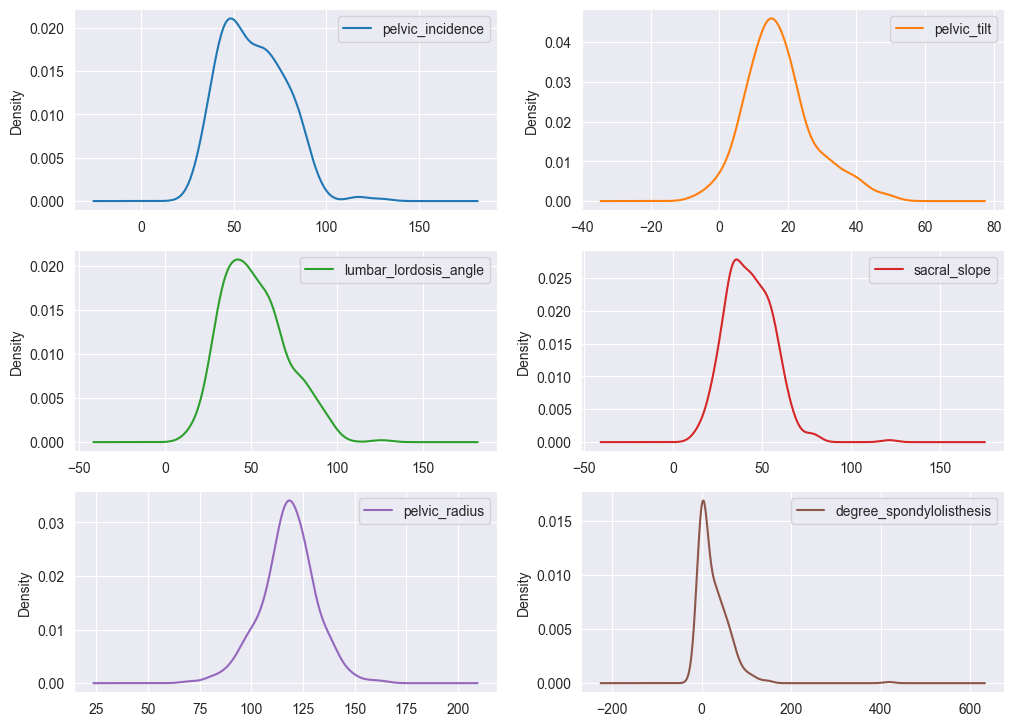

<Axes: ylabel='Density'>

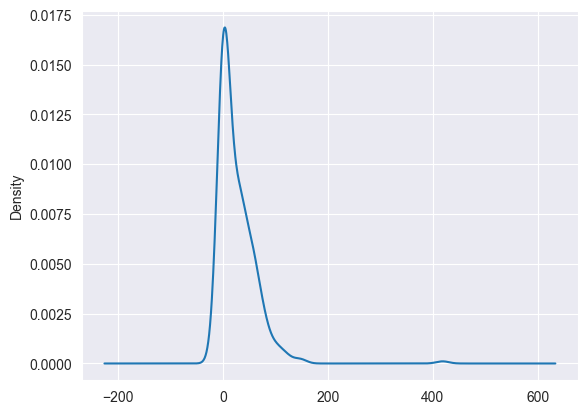

In [16]:
df.plot(
        kind='density', # tipo de gráfico: densidade (Kernel Density Estimate)
        subplots=True, # cria um gráfico separado para cada coluna
        figsize=(12,12),  # define o tamanho da figura (12x12 polegadas)
        layout=(4,2), # organiza os gráficos em uma grade de 4 linhas por 2 colunas
        sharex=False  # cada gráfico terá seu próprio eixo X (independente)
)

#Exibir os gráficos que foram gerados com o .plot()
plt.show()
df['degree_spondylolisthesis'].plot.density()



<Axes: ylabel='Frequency'>

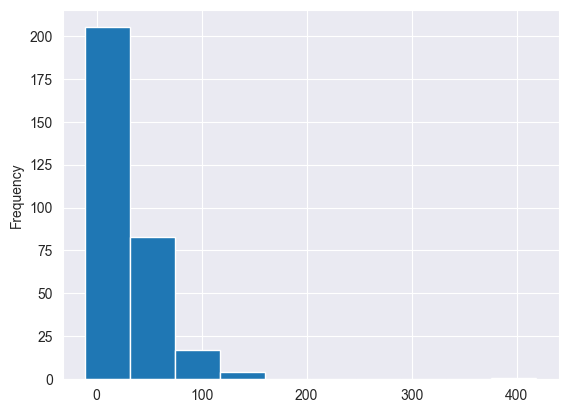

In [17]:
df['degree_spondylolisthesis'].plot.hist()

<Axes: >

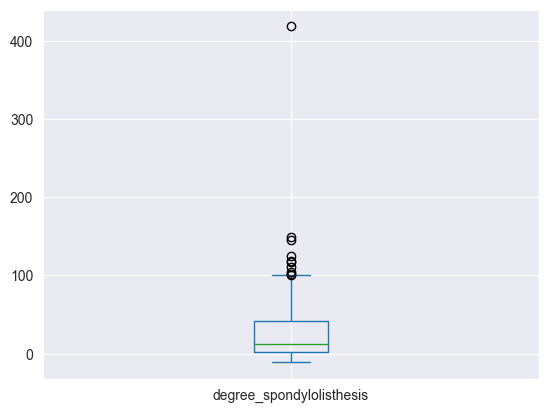

In [18]:
df['degree_spondylolisthesis'].plot.box()

In [19]:
# Conta quantas vezes cada categoria aparece na coluna 'class'
# Isso mostra o balanceamento das classes no dataset
df['class'].value_counts()

class
b'Spondylolisthesis'    150
b'Normal'               100
b'Hernia'                60
Name: count, dtype: int64

Cria um dicionário para mapear as classes do dataset:
'Abnormal' será representado por 1 e 'Normal' por 0
Obs: os valores vêm como bytes (b'...') porque o arquivo ARFF armazena assim

In [20]:
class_mapper = {b'Abnormal': 1, b'Normal': 0}

Substitui os valores da coluna 'class' usando o mapeamento definido

In [21]:
df['class'] = df['class'].replace(class_mapper)

Cria um gráfico de dispersão (scatter plot)
Mostra a relação entre a variável 'degree_spondylolisthesis' (eixo Y) e a variável 'class' (eixo X, que foi convertida para 0 = Normal e 1 = Abnormal)

 
 

TypeError: 'value' must be an instance of str or bytes, not a int

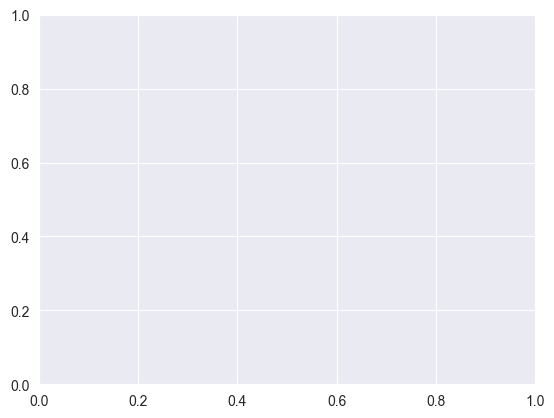

In [24]:
df.plot.scatter(
    y='degree_spondylolisthesis',
    x='class'
)

Cria boxplots para cada variável do DataFrame, agrupando os dados pela coluna 'class' (0 = Normal, 1 = Abnormal)

 

In [25]:
df.groupby('class').boxplot(
    fontsize=20,       # Tamanho da fonte dos rótulos
    rot=90,            # Rotaciona os nomes das variáveis em 90° (vertical) para melhor leitura
    figsize=(20,10),   # Define o tamanho da figura (20x10 polegadas)
    patch_artist=True  # Preenche as caixas dos boxplots com cor
)

TypeError: '<' not supported between instances of 'int' and 'bytes'

Calcula a matriz de correlação entre todas as variáveis numéricas do DataFrame

In [26]:
corr_matrix = df.corr()

ValueError: could not convert string to float: b'Hernia'

Seleciona a coluna 'class' da matriz de correlação e ordena os valores de forma decrescente
Assim, vemos quais variáveis estão mais correlacionadas (positiva ou negativamente) com a classe

In [ ]:
corr_matrix["class"].sort_values(ascending=False)

Cria uma matriz de scatter plots (gráficos de dispersão) entre todas as variáveis do DataFrame
Cada célula da matriz mostra a relação entre duas variáveis


 

In [ ]:
pd.plotting.scatter_matrix(
    df,          # DataFrame com os dados
    figsize=(12,12)  # Define o tamanho da figura
)

Exibe os gráficos

In [ ]:
plt.show()

Calcula a matriz de correlação entre todas as variáveis numéricas do DataFrame

In [ ]:
corr_matrix = df.corr()

Seleciona a coluna 'class' da matriz de correlação e ordena os valores de forma decrescente
Assim, vemos quais variáveis estão mais correlacionadas (positiva ou negativamente) com a classe

In [ ]:
corr_matrix["class"].sort_values(ascending=False)

Cria uma matriz de scatter plots (gráficos de dispersão) entre todas as variáveis do DataFrame
Cada célula da matriz mostra a relação entre duas variáveis

In [ ]:
pd.plotting.scatter_matrix(
    df,          # DataFrame com os dados
    figsize=(12,12)  # Define o tamanho da figura
)


Exibe os gráficos

In [ ]:
plt.show()

Importa a biblioteca Seaborn para visualizações estatísticas avançadas

In [27]:
import seaborn as sns

Cria uma figura e eixos para o gráfico, definindo o tamanho (10x10 polegadas)

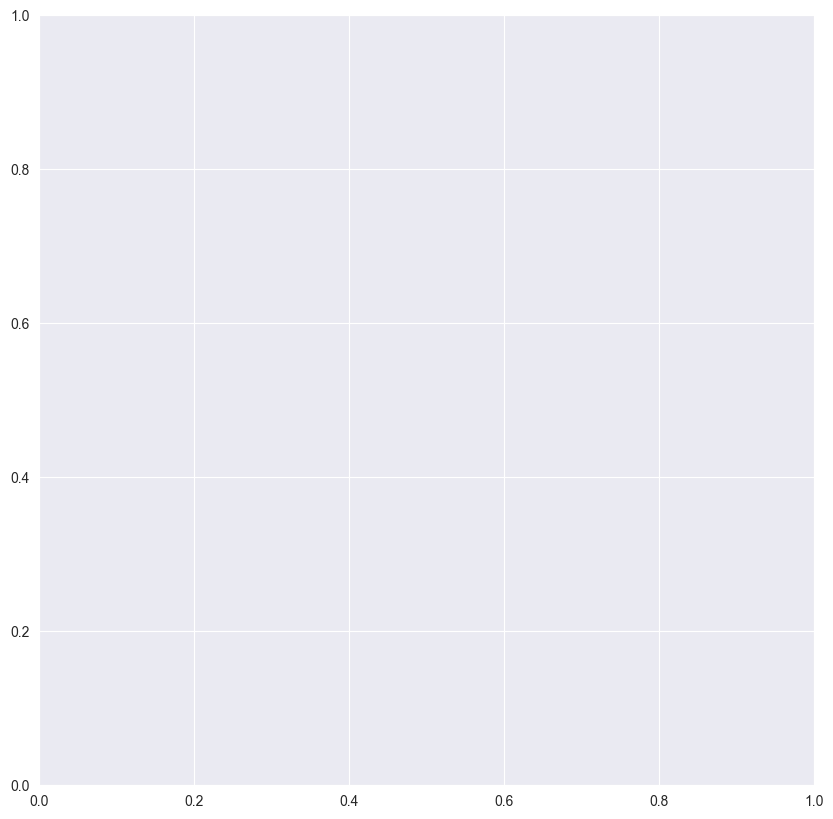

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

Define o mapa de cores para o heatmap
sns.color_palette("BrBG", 10) gera uma paleta de cores divergente com 10 tons

In [29]:
colormap = sns.color_palette("BrBG", 10)

Gera o heatmap da matriz de correlação
 - corr_matrix: matriz de correlação calculada anteriormente
 - cmap=colormap: define a paleta de cores
 - annot=True: adiciona os valores numéricos dentro de cada célula
- fmt=".2f": formata os números com duas casas decimais


In [30]:
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")

NameError: name 'corr_matrix' is not defined

Exibe o gráfico

In [31]:
plt.show()